In [28]:
#part (a)

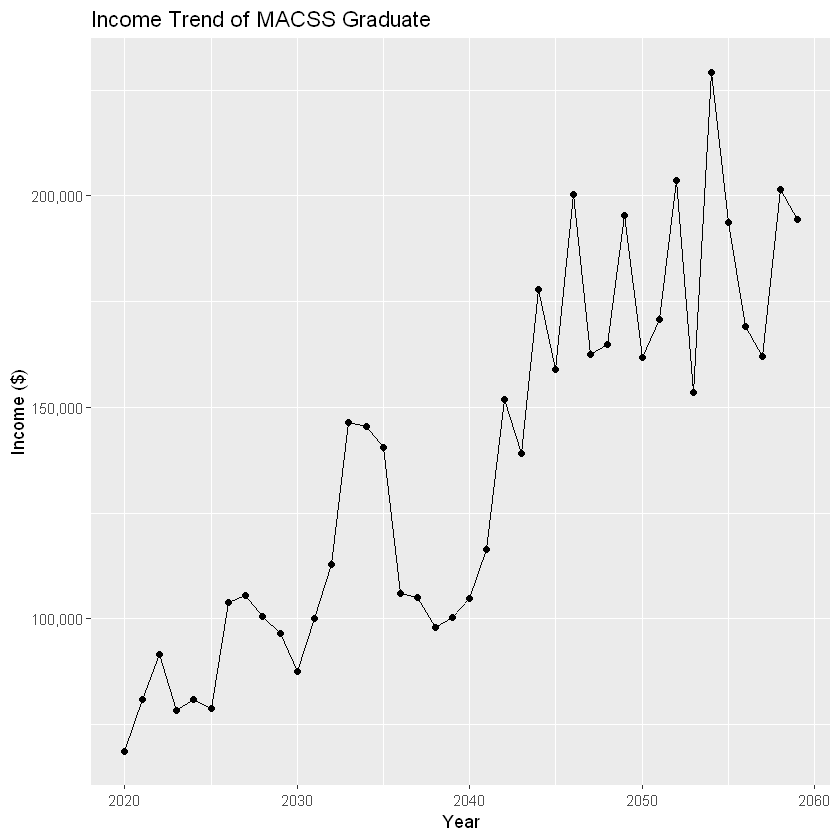

In [29]:
library(ggplot2)
library(tidyverse)
#initial values 
rho <- 0.4
sigma <- 0.13
g <- 0.025
inc0 <- 80000

#function for generating 40 random errors
errors_40 <- function(sig){
  err <- rnorm(40, 0 , sig)
  err
}

#function for generating income
gen_inc <- function(g, rho, sigma, init_inc){
  errors <- errors_40(sigma)
  inc_40y <- vector(length = 40)
  inc_40y[1] <- log(init_inc) + errors[1]
  t <- 1
  while (t <= 39){
      inc <- (1-rho)*(log(init_inc) + g*(t)) + rho*inc_40y[t] + errors[t + 1]
      inc_40y[t + 1] <- inc
      t <- t + 1
  }
  inc_40y
}

#function for simulation
income_sim <- function(g, rho, sigma, init_inc, num_sim){
  inc_list <- vector("list", num_sim)
  # generate 10,000 sets 
  i <- 1
  while (i <= 10000){
    inc_list[[i]] <- gen_inc(g, rho, sigma, init_inc)
    i <- i + 1
  }
  inc_list
}

#generate 10,000 simulation
inc_list <- income_sim(g, rho, sigma, inc0, 10000)

#draw one random path and make a graph
x <- 2020:2059
ran_int <- sample(1:10000, 1) 
y <- inc_list[[ran_int]]
df_a <- as.tibble(cbind(x,y))

#create a graph
df_a %>%
  ggplot(aes(x,exp(y))) + geom_line() + geom_point() + 
  xlab("Year") + ylab("Income ($)") + 
  ggtitle("Income Trend of MACSS Graduate") + 
  scale_y_continuous(labels=comma)

In [30]:
# part (b)

n
0.0449


n
0.1479


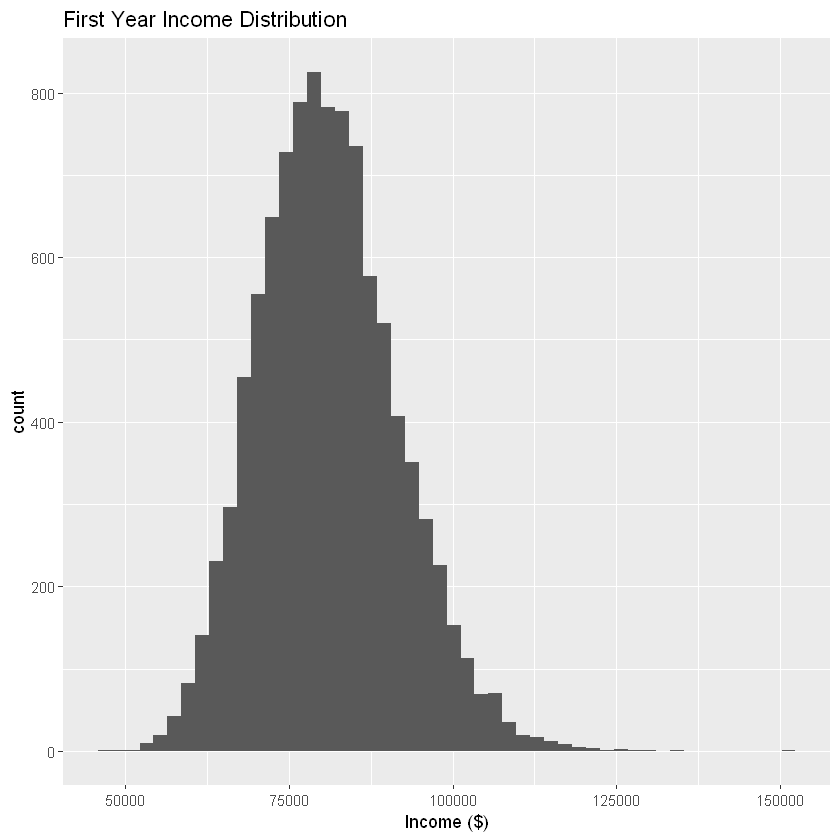

In [31]:
b_incomes <- vector(length = 10000)
k <- 1
while (k <= 10000){
  b_incomes[k] <- exp(inc_list[[k]][1])
    k <- k + 1
}
b_incomes <- as.tibble(b_incomes)
b_incomes %>%
  ggplot(aes(x = value)) + geom_histogram(bins = 50) +
  ggtitle("First Year Income Distribution") + xlab("Income ($)")

#more than 100,000
b_incomes %>%
  filter(value > 100000) %>%
  summarize(n = n()/10000)

#more than 100,000
b_incomes %>%
  filter(value < 70000) %>%
  summarize(n = n()/10000)

In [32]:
# part (c)

n
0.1669


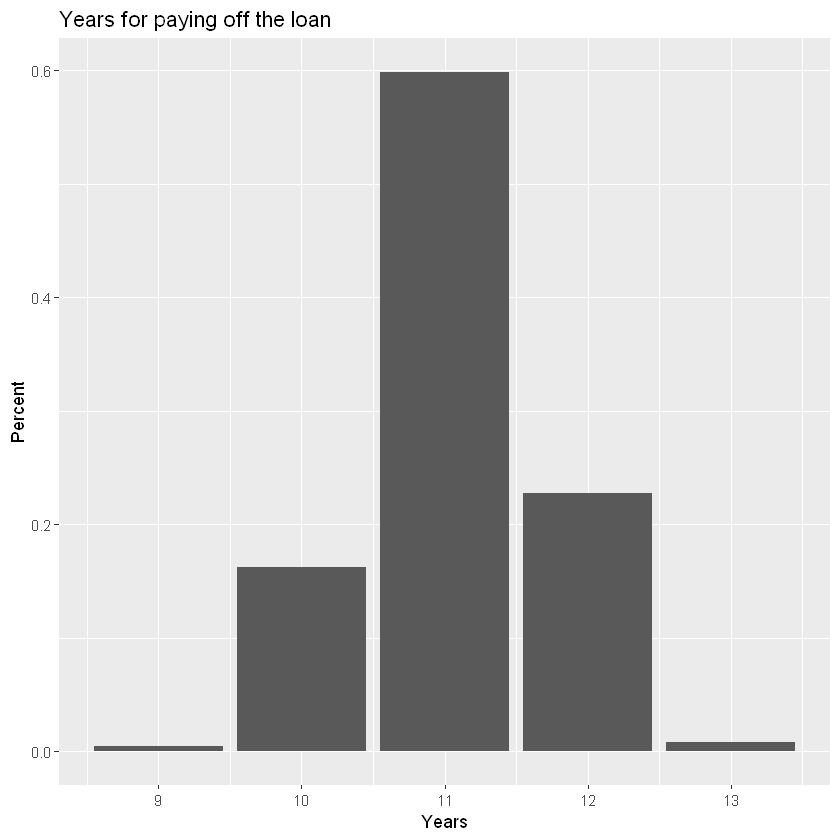

In [33]:
debt_cal <- function(debt_input, inc_list, incom_percent){
  result <- vector(length = 10000)
  j <- 1
  while (j <= 10000){
    year <- 0
    incomes <- exp(inc_list[[j]])
    k <- 0
    debt <- debt_input
    while (debt > 0){
      k <- k + 1
      debt <- debt - incomes[k] * 0.1
      result[j] <- k
    }
    j <- j + 1
  }
  result
}

debt_years <- debt_cal(95000, inc_list, 0.1)
df_debt <- as.tibble(debt_years)

df_debt %>%
  ggplot(aes(x = value)) + geom_bar(aes(y = (..count..)/sum(..count..))) +
  xlab("Years") + ylab("Percent") + ggtitle("Years for paying off the loan")

df_debt %>%
  filter(value <= 10) %>%
  summarize(n = n() / 10000)

In [34]:
#part (d)

n
0.9011


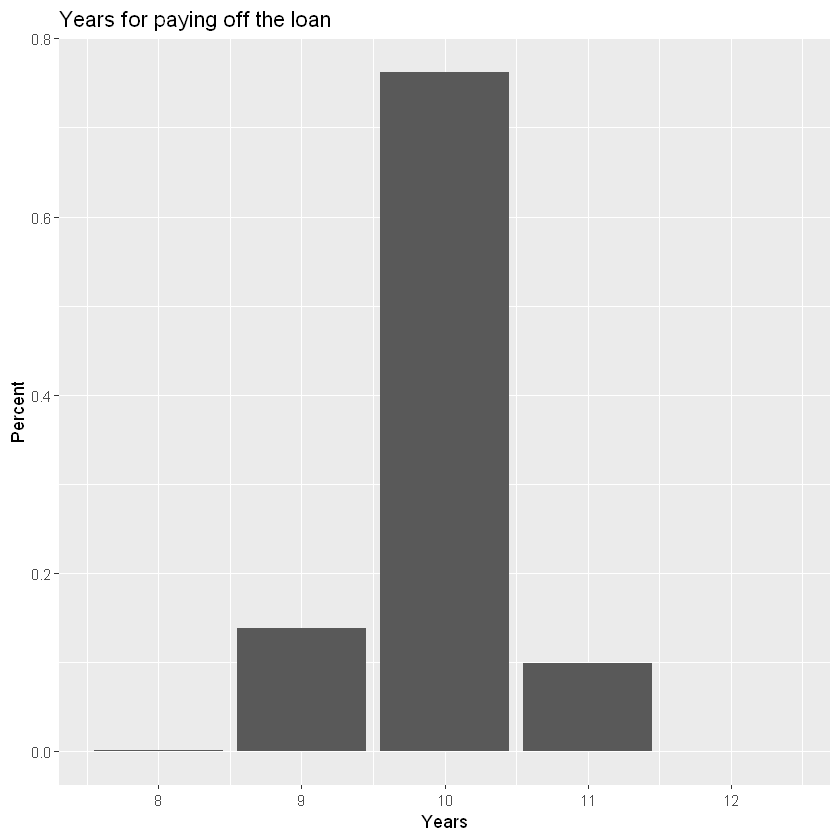

In [35]:
inc_list_2 <- income_sim(g, 0.17, sigma, 90000, 10000)
debt_years_re <- debt_cal(95000, inc_list_2, 0.1)
df_debt_re <- as.tibble(debt_years_re)

df_debt_re %>%
  ggplot(aes(x = value)) + geom_bar(aes(y = (..count..)/sum(..count..))) +
  xlab("Years") + ylab("Percent") + ggtitle("Years for paying off the loan")

df_debt_re %>%
  filter(value <= 10) %>%
  summarize(n = n() / 10000)